# TV Shows Viewer Analysis
## Saeah Go


### Data Definitions
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; The following real-world Uverse data gives information about the viewers of several TV shows. The information included about a particular view is gender, age, household income code, and observation status of a given TV show. A positive observation (‘1’) indicates that the particular viewer watched the given show, while a negative observation (‘0’) indicates they do not watch the show. There are six shows captured for each viewer. Each field is separated by a pipe (‘|’). The data is available here: modified_uverse_data.txt.zip. Note: Click the download file icon at top right. The preview feature doesn't work but it will download - takes some time due to file size.
### Column Titles 
PERSON_GENDER_CD | PERSON_AGE_NBR | HOUSEHOLD_INCOME_ID | DOG_WHISPERER | DOGS_101 | CATS_101 | BAD_DOG | PUPPIES_VS_BABIES | PUPPY_BOWL
### Sample Data 
1|47|C|1|0|0|0|0|0\
1|51|D|0|0|0|0|0|0\
1|26|9|0|0|0|0|0|0
### Format the data
Gender Code\
Valid Gender Codes:
* 1 = Male
* 2 = Female
* 3 = Unknown\
All other values in gender code should be cleaned up by either removing them or adding them to Unknown
### Income Level Code
Valid Income Level Codes:
* 1-9, A-D \
Invalid Income Level Codes:
* NA
### TV Shows
Valid values:
* 1 = Positive Observation
* 0 = Negative Observation



### Questions 
1. How many viewers have the income code 4?
2. How many females are in the population?
3. What is the median age?
4. What is the mode of the income level code?
5. How many viewers are under the age of 18?

### Predictive Models
##### Regression
* Create a linear model to showing the relationship between a viewer's age and the total number of TV shows watched
##### Classification/Clustering
* Create a cluster about each show (might be best to do a subset for each TV show) to show which age/age range is most likely to watch taht show
* Create a cluster showing which gender code is more likely to have a certain income level. Hint: you can take a similar approach to question 1 for the graphs or you can find a way to put all income codes in 1 graph

In [0]:
import numpy as np
import pandas as pd

# display all columns
pd.set_option('display.max_columns', None)

# load the dataset
data = pd.read_csv("/dbfs/FileStore/tables/sg5759@att.com/modified_uverse_data.txt", sep="|", low_memory=False, header=None, names=["PERSON_GENDER_CD", "PERSON_AGE_NBR", "HOUSEHOLD_INCOME_ID", "DOG_WHISPERER", "DOGS_101", "CATS_101", "BAD_DOG", "PUPPIES_VS_BABIES", "PUPPY_BOWL"])
# print(data.head(15))

In [0]:
# preprocessing

# check the data structure; it is dataframe
print(type(data))

# change the value from object to numeric first? 
data['PERSON_GENDER_CD'] = pd.to_numeric(data['PERSON_GENDER_CD'], errors='coerce')

# and assign 3 if a value is not 1,2 or 3
data.loc[~data['PERSON_GENDER_CD'].isin([1,2,3]), 'PERSON_GENDER_CD'] = 3
data['PERSON_GENDER_CD'] = data['PERSON_GENDER_CD'].fillna(3)

# change to integer type
data['PERSON_GENDER_CD'] = data['PERSON_GENDER_CD'].astype(int)

# double check if the gender code clean up finished well
print(data["PERSON_GENDER_CD"].unique())

data.dtypes

<class 'pandas.core.frame.DataFrame'>
[1 2 3]
Out[197]: PERSON_GENDER_CD         int64
PERSON_AGE_NBR         float64
HOUSEHOLD_INCOME_ID     object
DOG_WHISPERER            int64
DOGS_101                 int64
CATS_101                 int64
BAD_DOG                  int64
PUPPIES_VS_BABIES        int64
PUPPY_BOWL               int64
dtype: object

In [0]:
print(data.shape[0])

4041319


In [0]:
# count the number of viewers who have the income code 4
print(data["HOUSEHOLD_INCOME_ID"].value_counts()[4])

281624


In [0]:
# count the number of females in the population
print(data["PERSON_GENDER_CD"].value_counts()[2])

1564665


In [0]:
# median age
data["PERSON_AGE_NBR"].median()

Out[201]: 52.0

In [0]:
# mode of the income level code
data.mode()["HOUSEHOLD_INCOME_ID"][0]

Out[202]: '6'

In [0]:
under_18 = data[data["PERSON_AGE_NBR"] < 18]
print(len(under_18))

669


### Solution: 
1. 281,624 viewers have the income code 4.
2. 1,564,665 females are in the population out of 4,041,319 survey attendees.
3. The median age of survey participants is 52.
4. The mode of the income level code is 6, it means 6 is the most common income code (appeared most)
5. There are 669 viewers who are under the age of 18.

## Regression

In [0]:
# create a column show the total number of TV shows watched
data["SUM_TV_SHOW"] = data[["DOG_WHISPERER", "DOGS_101", "CATS_101", "BAD_DOG", "PUPPIES_VS_BABIES", "PUPPY_BOWL"]].sum(axis=1)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data_reg = data.copy()

# deal with NaN value 
data_reg["PERSON_AGE_NBR"] = data_reg["PERSON_AGE_NBR"].fillna(0)
data_reg["SUM_TV_SHOW"] = data_reg["SUM_TV_SHOW"].fillna(0)

#split test and train
x = data_reg[["PERSON_AGE_NBR"]].to_numpy()
y = data_reg[["SUM_TV_SHOW"]].to_numpy()

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#build regression model
reg = LinearRegression().fit(x_train, y_train)
print(reg.coef_, reg.intercept_)

[[0.00150391]] [0.2079227]


TotalNumTVShow = 0.00149759 ViewerAge + 0.20792432 \
A little positive relationship

## Classification/Clustering
•	Create a cluster about each show (might be best to do a subset for each TV show) to show which age/age range is most likely to watch that show 


In [0]:
DogWhisperer = data[['PERSON_AGE_NBR', 'DOG_WHISPERER']]
Dogs101 = data[['PERSON_AGE_NBR', 'DOGS_101']]
Cats101 = data[['PERSON_AGE_NBR', 'CATS_101']]
BadDog = data[['PERSON_AGE_NBR', 'BAD_DOG']]
PuppiesVSBabies = data[['PERSON_AGE_NBR', 'PUPPIES_VS_BABIES']]
PuppyBowl = data[['PERSON_AGE_NBR', 'PUPPY_BOWL']]

In [0]:
def data_cleaning(data):
  # subset with the viewers of dog whisperer only
  cleaned_data = data[data.iloc[:, 1] == 1]
  # then group by the PERSON_AGE_NBR column and count the number of viewers in each age group
  viewers_by_age = cleaned_data.groupby('PERSON_AGE_NBR').size()
  # convert the Series to a numpy array
  viewers_by_age_np = np.array(list(viewers_by_age.items()))

  return viewers_by_age_np

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp

def model_development(X_scale, tv_show_name):
  # Scale the data
  kmeans = KMeans(n_clusters=6, random_state=0)
  kmeans.fit(X_scale)

  cluster_assignments = kmeans.labels_
  plt.scatter(X_scale[:, 0], X_scale[:, 1], c=cluster_assignments, cmap='viridis') 
  plt.xlabel('Age')
  plt.ylabel(tv_show_name)
  plt.title(tv_show_name + ' viewers by Age')
  plt.show()

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


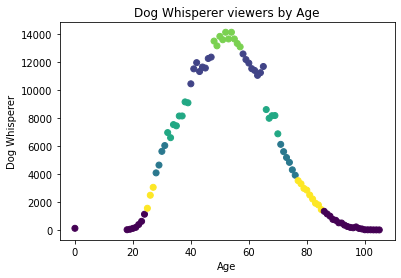

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


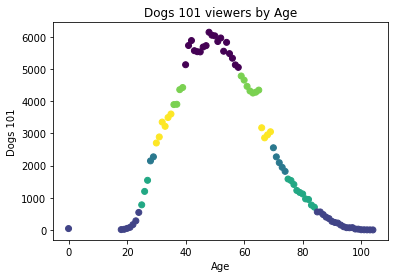

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


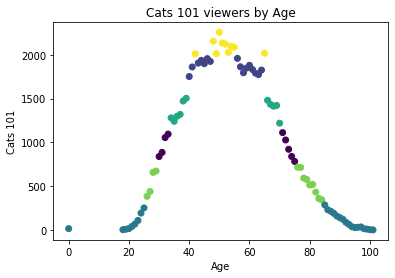

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


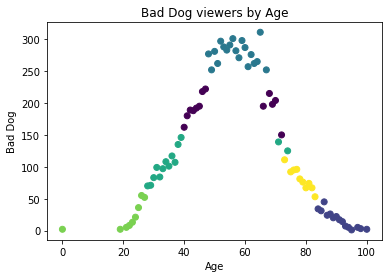

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


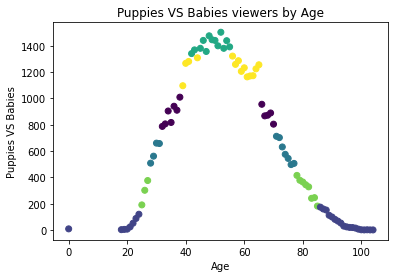

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


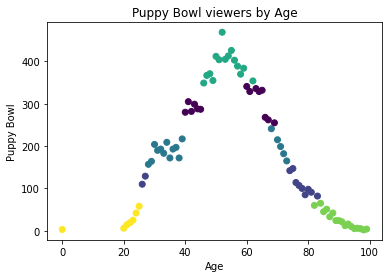

In [0]:
tv_shows = [DogWhisperer, Dogs101, Cats101, BadDog, PuppiesVSBabies, PuppyBowl]
tv_show_name = ['Dog Whisperer', 'Dogs 101', 'Cats 101', 'Bad Dog', 'Puppies VS Babies', 'Puppy Bowl']

for i in range(len(tv_shows)):
  tv_show_data = tv_shows[i]
  cleaned_data = data_cleaning(tv_show_data)
  model_development(cleaned_data, tv_show_name[i])

I would say the age range 40-60, or age 50 is most likely watch all of the shows. We can check that each cluster graph has a mountain shape which peaks in age 40 to 60.

•	Create a cluster showing which gender code is more likely to have a certain income level. Hint: you can take a similar approach to question 1 for the graphs or you can find a way to put all income codes in 1 graph

In [0]:
gender_income['HOUSEHOLD_INCOME_ID'].unique()

Out[210]: array([12, 13,  9, 10,  7, 11,  6,  3,  8,  5,  4,  1,  2])

In [0]:
gender_income = data[["PERSON_GENDER_CD", "HOUSEHOLD_INCOME_ID"]]

# remove invalid income code
gender_income = gender_income.dropna(subset=['HOUSEHOLD_INCOME_ID'])

# Create a mapping dictionary (input should be numeric for clustering)
map_dict = {'A': 10, 'B': 11, 'C': 12, 'D': 13}

# Use the map function to replace the alphabetic characters
gender_income['HOUSEHOLD_INCOME_ID'] = gender_income['HOUSEHOLD_INCOME_ID'].replace(map_dict).astype(int)

In [0]:
def data_cleaning(data, i):
  # subset with the specific gender only
  cleaned_data = data[data['PERSON_GENDER_CD'] == i]
  # then group by the HOUSEHOLD_INCOME_ID column and count the number of people in each income code group
  income_by_gender = cleaned_data.groupby("HOUSEHOLD_INCOME_ID").size()
  # convert the Series to a numpy array
  income_by_gender_np = np.array(list(income_by_gender.items()))
  
  return income_by_gender_np

In [0]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import preprocessing as pp


def model_development(X_scale, gender_name):
  
  kmeans = KMeans(n_clusters=4, random_state=0)
  kmeans.fit(X_scale)

  cluster_assignments = kmeans.labels_
  
  plt.scatter(X_scale[:, 0], X_scale[:, 1], c=cluster_assignments, cmap='viridis') 
  plt.xlabel('Income Code')
  plt.ylabel(gender_name)
  plt.title('Income distribution by ' + gender_name)
  plt.show()

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


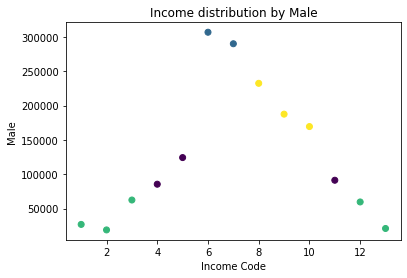

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


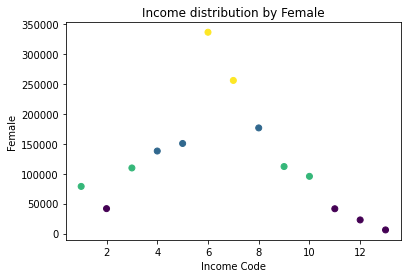

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


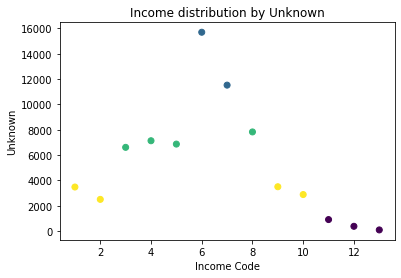

In [0]:
gender_name = ['Male', 'Female', 'Unknown']

for i in range(1, 4):
  gender_income_data = gender_income.copy() # by copying the data, we prevent the original dataset get changed
  cleaned_data = data_cleaning(gender_income_data, i)
  model_development(cleaned_data, gender_name[i-1])

We can find that income code 6 is the most common income code, it's expected see through the Question 4 (mode of the income code level)